In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
    f1_score, roc_curve, auc, confusion_matrix, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
from sklearn.utils import resample

In [5]:
df = pd.read_csv('data/UCI_Credit_Card.csv')

In [6]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [7]:
def get_to_know_df(df: pd.DataFrame) -> None:
    print(df.head)
    print('the data types are: ', df.dtypes)
    print('the sum of the null values is: ', df.isnull().sum())
    print('the names of the columns are: ', df.columns)
    print('the description of the data is: ', df.describe())
    print('the shape of the data is: ', df.shape)
    for column in df.columns.tolist():
        print(str(column))
        print(df[column].unique())

In [8]:
get_to_know_df(df)

<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BI

In [9]:
df = df.rename(columns={"default.payment.next.month": "default_payment_next_month"})
df = df.drop(columns='ID')
print(df.shape)


(30000, 24)


In [10]:
df_cleaned = df

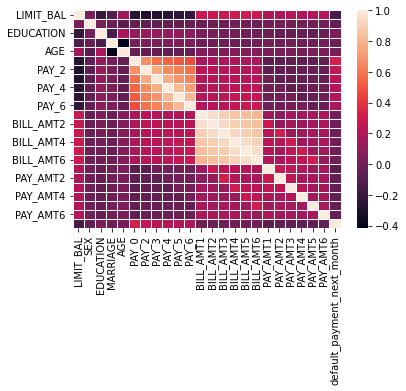

In [11]:
ax = sns.heatmap(df_cleaned.corr(), linewidths=.5)

In [23]:
def model_metrics_comparison(model_dict, X_train, y_train, X_test,
                             y_test):
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
        model_comparison_df.to_csv('model_comparison.csv')
    return model_comparison_df

In [25]:
model_dict = {'dummy': DummyClassifier(),
              #'Stochastic Gradient Descent' : SGDClassifier(),
              'random_forest': RandomForestClassifier(),
              'decision_tree': DecisionTreeClassifier(),
              'ada_boost': AdaBoostClassifier(),
              'multinomial_naive_bayes': MultinomialNB(),
              'logistic_regression': LogisticRegression(),
              'k_nearest_neighbor': KNeighborsClassifier()}

In [26]:
X = np.array(df_cleaned.drop(columns='default_payment_next_month'))
y = np.array(df_cleaned['default_payment_next_month'])
print('x shape', X.shape)
print('y shape', y.shape)

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

print('x_train shape', X.shape)
print('y_train shape', y.shape)
print('x_test shape', X.shape)
print('y_test shape', y.shape)


model_comparison = model_metrics_comparison(model_dict, X_train, y_train, X_test, y_test)

x shape (30000, 23)
y shape (30000,)
x_train shape (30000, 23)
y_train shape (30000,)
x_test shape (30000, 23)
y_test shape (30000,)


ValueError: Found input variables with inconsistent numbers of samples: [21000, 9000]

In [12]:
models = pd.read_csv('model_comparison.csv')

In [13]:
models

,Unnamed: 0,model_name,accuracy_score,precision_score,recall_score,f1_score
0,2,random_forest,0.813222,0.740203,0.654043,0.676818
1,4,ada_boost,0.814667,0.757442,0.635434,0.659079
2,6,k_nearest_neighbor,0.793222,0.694722,0.635844,0.652521
3,3,decision_tree,0.726444,0.612507,0.618096,0.615012
4,5,logistic_regression,0.806222,0.761887,0.597671,0.611952
5,1,Stochastic Gradient Descent,0.787333,0.717105,0.544129,0.529230
6,0,dummy,0.777000,0.388500,0.500000,0.437254


In [16]:
df_majority = df_cleaned[df_cleaned['default_payment_next_month'] == 1]
df_minority = df_cleaned[df_cleaned['default_payment_next_month'] == 0]
df_majority_downsampled = resample(df_majority, n_samples=17000)
df_minority_upsampled = resample(df_minority, n_samples=17000)
df_resampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [17]:
df_resampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
27139,200000.0,1,1,1,46,2,2,2,2,2,...,65199.0,79104.0,80692.0,3000.0,3000.0,0.0,15000.0,3000.0,3000.0,1
17020,60000.0,2,2,1,24,2,0,0,0,2,...,62309.0,60435.0,55468.0,2850.0,2130.0,7050.0,0.0,3190.0,2100.0,1
7374,180000.0,1,2,2,38,-1,-1,2,0,0,...,52096.0,51508.0,50867.0,4400.0,0.0,2000.0,2000.0,2000.0,3000.0,1
29900,20000.0,1,2,2,29,0,0,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29366,20000.0,1,2,2,26,3,2,2,2,2,...,300.0,300.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544,200000.0,1,1,2,27,1,-2,-1,0,-1,...,6460.0,630.0,500.0,0.0,6331.0,129.0,630.0,500.0,0.0,0
14725,30000.0,2,3,2,43,0,0,0,0,0,...,26554.0,18869.0,12359.0,1588.0,1789.0,790.0,471.0,352.0,121.0,0
7683,400000.0,2,2,2,40,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16530,50000.0,1,2,2,27,0,0,0,0,0,...,33512.0,29854.0,28144.0,1600.0,2000.0,6416.0,4406.0,1014.0,3006.0,0


In [18]:
df_resampled.default_payment_next_month.value_counts()

1    17000
0    17000
Name: default_payment_next_month, dtype: int64

In [19]:
def resample_data(df, n_samples):
    # Separate majority and minority classes
    df_majority = df[df['default_payment_next_month'] == 1]
    df_minority = df[df['default_payment_next_month'] == 0]
    df_majority_downsampled = resample(df_majority, n_samples=n_samples)
    df_minority_upsampled = resample(df_minority, n_samples=n_samples)
    df_resampled = pd.concat([df_majority_downsampled, df_minority_upsampled])
    return df_resampled

In [20]:
df_resampled = resample_data(df_cleaned, 17000)

In [21]:
df_resampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
20010,210000.0,2,2,1,34,0,0,2,0,0,...,178416.0,143879.0,125004.0,17580.0,0.0,7193.0,3500.0,4881.0,3679.0,1
29982,90000.0,1,2,1,36,0,0,0,0,0,...,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1
1616,20000.0,1,2,3,35,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4372,400000.0,2,1,1,28,0,0,-2,-2,-1,...,38000.0,150.0,193.0,4000.0,2000.0,1000.0,150.0,193.0,3690.0,1
15030,150000.0,1,1,1,46,2,2,2,2,2,...,64644.0,40150.0,41250.0,5400.0,5026.0,1722.0,1500.0,3000.0,108058.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,80000.0,2,2,1,27,-1,-1,-1,-1,-1,...,2862.0,5539.0,0.0,0.0,680.0,2862.0,5539.0,0.0,5775.0,0
27023,10000.0,1,3,2,41,0,0,0,0,0,...,8727.0,8148.0,8640.0,2000.0,4946.0,2000.0,1000.0,1000.0,1000.0,0
14834,200000.0,1,1,2,37,0,0,0,0,0,...,139209.0,135902.0,138997.0,15034.0,20038.0,20019.0,5014.0,10047.0,10238.0,0
9277,160000.0,1,1,2,31,-1,-1,-1,-1,-1,...,2773.0,215.0,2026.0,1351.0,0.0,2773.0,215.0,2026.0,0.0,0
